https://www.aps.anl.gov/Beamline-Selection/Technical-Information/Storage-Ring-Parameters

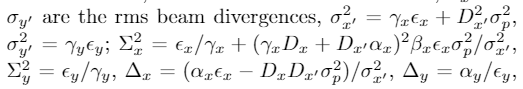

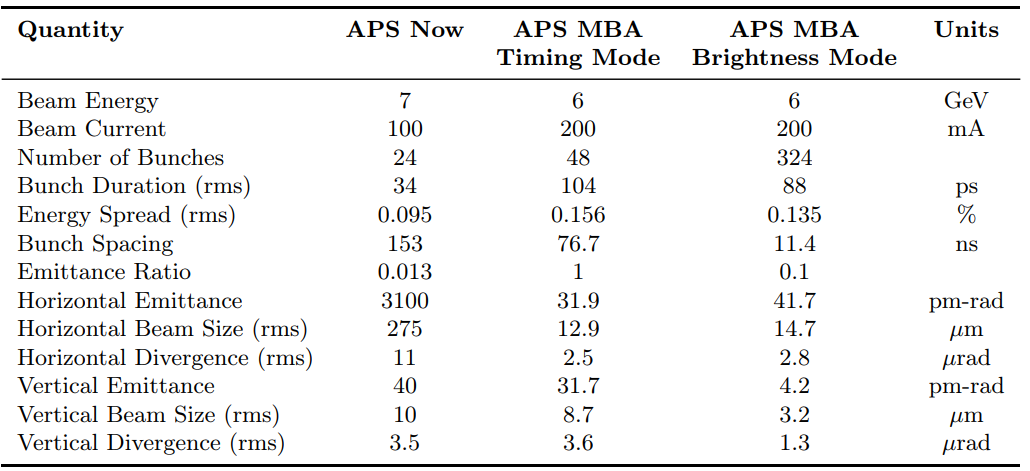

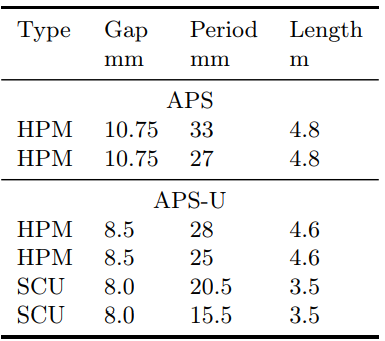

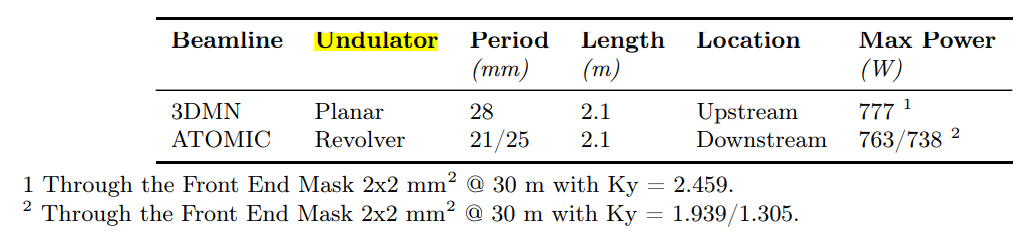

In [1]:
import numpy as np
Ku = 2.459
lamu = 2.8e-2
gamma = 6e9/0.511e6
lam1 = lamu/2/gamma**2*(1+Ku**2/2)
ex = 31.9e-12 # m
kappa = 1.0
ey = 31.7e-12
# betax, betay = 
sx = 12.9e-6
sy = 8.7e-6
bx = sx**2/ex
by = sy**2/ey
sxp = 2.5e-6
syp = 3.6e-6
gx = sxp**2/ex
gy = syp**2/ey
sdp = 13.9*1e-4
Dx = 0.001
lam1

4.085583812724167e-10

In [18]:
1/Nu

0.013333333333333334

In [2]:
1240e-9/lam1

3035.0619564776434

In [3]:
(gx*Dx)**2*bx*ex*sdp**2/sxp**2/(ex/gx)

0.01212847852496795

In [4]:
from scipy.special import jn
def Fh(h, Ku):
    Y = h*Ku**2/4/(1+Ku**2/2)
    return h**2*Ku**2/(1+Ku**2/2)**2*(jn((h+1)/2, Y)-jn((h-1)/2, Y))**2

In [5]:
sz = 104e-12*3e8
Lu = 2.1
Nu = Lu/lamu
skrel = 1/Nu*1e-1
sk = skrel*2*np.pi/lam1
sl = skrel*lam1
Ml = 2*sk*sz
Ne = 200e-3*76.7e-9/1.602e-19
avN = 1/137*Nu**2*gamma**2*2*np.pi*(1/gamma*np.sqrt((1+Ku**2/2)/Nu)/2)**2*np.sqrt(2*np.pi)\
    * skrel*Ne*Fh(1,Ku)
usx = 1/gamma*np.sqrt((1+Ku**2/2)/Nu)/2
usy = usx
k0 = 2*np.pi/lam1
M = np.sqrt(
    (1+4*sk**2*sz**2)
    * (1+4*k0**2*sx**2*(sxp**2+usx**2)+sxp**2/usx**2)
    * (1+4*k0**2*sy**2*(syp**2+usy**2)+syp**2/usy**2)
)
Ne, Ml, avN, usx, M, lam1*1e6, k0*sx*usx, k0*sy*usy, k0*sx*sxp, k0*sy*syp, sxp, usx, 8*sk*sz*k0**2*sxp*syp*usx*usy, lam1

(95755305867.66542,
 1279525.86832083,
 251926284.2863496,
 9.862849743601548e-06,
 16018471.21341622,
 0.0004085583812724167,
 1.9566712840344398,
 1.3196155171395056,
 0.495970063141187,
 0.48166767062269683,
 2.5e-06,
 9.862849743601548e-06,
 1059760.9031575383,
 4.085583812724167e-10)

In [6]:
avN/M

15.727236446593576

In [19]:
1e-3/30, usx

(3.3333333333333335e-05, 9.862849743601548e-06)

In [8]:
usx/sxp

3.945139897440619

In [9]:
usy/syp

2.7396804843337637

In [10]:
1/137*(np.pi/2)**(3/2)*Fh(1, Ku)*gamma**2*Nu**2*Ne/sx/sy/sz/k0**3

19.06334617196209

In [11]:
k0*sx*usx, k0*sy*usy, k0*sx*sxp, k0*sy*syp

(1.9566712840344398,
 1.3196155171395056,
 0.495970063141187,
 0.48166767062269683)

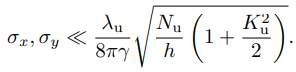

In [12]:
Ne

95755305867.66542

In [13]:
sz

0.031200000000000002

In [14]:
lamu/8/np.pi/gamma*np.sqrt(Nu*(1+Ku**2/2))

1.6482073541501598e-06

In [15]:
np.sqrt(2*Lu*lam1)/4/np.pi, sx, sy

(3.2964147083003197e-06, 1.29e-05, 8.7e-06)

In [16]:
sxp, usx, syp, usy

(2.5e-06, 9.862849743601548e-06, 3.6e-06, 9.862849743601548e-06)

In [17]:
np.sqrt(
    (1+4*sk**2*sz**2)
    * (1+4*k0**2*sx**2*(usx**2))
    * (1+4*k0**2*sy**2*(usy**2)))

14586135.764225274

In [20]:
3*usx

2.9588549230804644e-05

In [16]:
import sys

from wigrad import Wiggler, WigglerRadiationSimulator

import scipy.signal
from scipy.optimize import minimize
import pandas as pd
pd.set_option('max_columns', None)
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
from fur.one_data_set_analyzer import analyze_one_dataset
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data, get_acnet_df_with_bunch_sizes
shift = path_assistant.PathAssistant('shift_03_16_2020',
    ignore_files=['RefCurve_2020-03-16_0_084020_test.Wfm.bin',
                  'RefCurve_2020-03-16_153_155200.Wfm.bin'])
#shift_03_09_2020.show_waveform_file_names()
waveforms_dir = shift.get_waveforms_dir()
results_dir = shift.get_results_dir()
from config import get_from_config, save_to_config
from wiggler_radiation.number_of_coherent_modes.coherent_modes import get_M_interpolator_at_fixed_energy
import lattice.lattice as lattice
from lattice.summary_in_undulator import CalcTransverseBeamParams
from wiggler_radiation.Wigrad.wigrad_generator import \
    generate_wr_sim_with_wigrad_results_and_spectral_transmission
import coherent_modes_cpp as cm



m0 = 10000
mfold = 11
seed = 1


wiggler = Wiggler(K_peak=Ku, N_periods=Nu, lambda_wiggler_m=lamu)
xmax = 3*usx  # rad
ymax = xmax  # rad
n_x = 400  # after using symmetries the size will be twice that
n_y = 400  # after using symmetries the size will be twice that
n_l = 100
lmin = (lam1-3*sl)*1e6  # um
lmax = (lam1+3*sl)*1e6  # um
x_step = xmax/(n_x-1)
y_step = ymax/(n_y-1)
l_step = (lmax-lmin)/(n_l-1)
# this mesh is only for positive theta_x and theta_y, the results will be extended later using symmetries (two mirror symmetries: along y-axis and along x-axis)
mesh = (np.linspace(x_step/2, xmax, n_x),
        np.linspace(y_step/2, ymax, n_y),
        np.linspace(lmin, lmax, n_l))

spect = np.exp(-1/2/(sl*1e6)**2*(np.linspace(lmin, lmax, n_l)-lam1*1e6)**2)

wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=gamma,
    harmonics=[1],  # harmonics to be calculated have to be specified
    aperture=None,  # as of now the only other option is 'ellipse'
    spectral_transmission=None  # you can provide transmission of filters, QE of detector here, 1D array of the same length as the wavelengths array
    )

wr_sim.calc_amplitude_on_meshgrid()

wr_sim.extend_results_using_symmetries()

ampx3d = wr_sim.get_amplittude_3D(polarization='x')

xmin = -xmax
ymin = -ymax

dax = x_step
day = y_step
dl = l_step
elliptic_aperture = \
        (wr_sim.x_3D**2/xmax**2+wr_sim.y_3D**2/ymax**2) < 1
sm =dax*day*dl*np.sum(
    spect[:,None,None]*np.absolute(ampx3d*elliptic_aperture)**2)


# In[13]:


st = sz*1e6
Sx, Sy, dx, dy, sxp, syp = sx*1e6, sy*1e6, 0, 0, sxp, syp
coh_modes_cpp_args =  np.asarray([Sx,Sy,dx,dy,sxp,syp,xmin,xmax,ymin,ymax,lmin,lmax,
                                  st, sm, m0,mfold,seed],
                                dtype=np.float64)
Mi = np.real(
    cm.CalcMFromPrecalculatedFieldAmps(ampx3d,spect,coh_modes_cpp_args)[-1])
print(Mi)

12124563.418806495


In [17]:
xmax

2.9588549230804644e-05

In [18]:
print(f"{Mi:.1e}")

1.2e+07


In [19]:
print(f"{sm*Ne:.1e}")

2.3e+08


In [20]:
print(f"{Ne:.1e}")

9.6e+10


In [21]:
sm*Ne/Mi

19.352594422360518

In [22]:
xmax

2.9588549230804644e-05

In [23]:
lam1

4.085583812724167e-10

In [24]:
1.4109e+3*sl/lam1

1.8812000000000004

In [25]:
lam1/sl

749.9999999999999

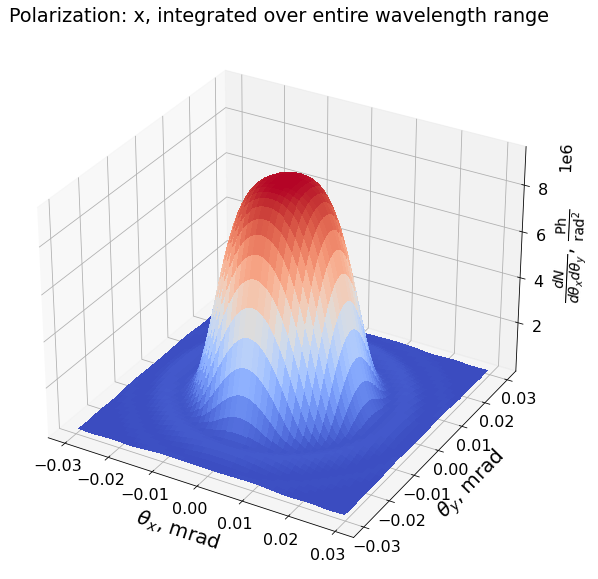

In [26]:
wr_sim.show_angular_distribution(polarization='x')

In [27]:
mesh

(array([3.70783825e-08, 1.11142219e-07, 1.85206056e-07, 2.59269893e-07,
        3.33333729e-07, 4.07397566e-07, 4.81461403e-07, 5.55525239e-07,
        6.29589076e-07, 7.03652913e-07, 7.77716750e-07, 8.51780586e-07,
        9.25844423e-07, 9.99908260e-07, 1.07397210e-06, 1.14803593e-06,
        1.22209977e-06, 1.29616361e-06, 1.37022744e-06, 1.44429128e-06,
        1.51835512e-06, 1.59241895e-06, 1.66648279e-06, 1.74054663e-06,
        1.81461046e-06, 1.88867430e-06, 1.96273814e-06, 2.03680197e-06,
        2.11086581e-06, 2.18492965e-06, 2.25899348e-06, 2.33305732e-06,
        2.40712116e-06, 2.48118499e-06, 2.55524883e-06, 2.62931267e-06,
        2.70337650e-06, 2.77744034e-06, 2.85150418e-06, 2.92556801e-06,
        2.99963185e-06, 3.07369569e-06, 3.14775952e-06, 3.22182336e-06,
        3.29588720e-06, 3.36995103e-06, 3.44401487e-06, 3.51807871e-06,
        3.59214254e-06, 3.66620638e-06, 3.74027022e-06, 3.81433405e-06,
        3.88839789e-06, 3.96246173e-06, 4.03652556e-06, 4.110589

In [30]:
np.sqrt(1.16e-6/2/(10*0.055))

0.0010269106361049409